In [1]:
#impoer estential lib

from sound_function import *
import numpy as np
import wave
import numpy as np
from scipy import signal
import scipy.io.wavfile as wavfile
import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.layers as nn
np.random.seed(123)
tf.random.set_seed(0)

In [2]:
# # Set the path to your data folder
# data_folder = "Datasets/yn_image"

# # Define the parameters for loading the dataset
# batch_size = 32
# image_size = (128, 342)  # Specify the desired image size
# # validation_split = 0.0  # Fraction of data to use for validation

# # Load the dataset from the folder
# train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     data_folder,
#     color_mode='grayscale',
#     validation_split = None ,
#     seed=123,  # Set a seed for reproducibility
#     image_size=image_size,
#     batch_size=batch_size,
# )

# # validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
# #     data_folder,
# #     color_mode='grayscale',
# #     validation_split=validation_split,
# #     subset="validation",
# #     seed=123,
# #     image_size=image_size,
# #     batch_size=batch_size,
# # )





# # Print class names
# class_names = train_dataset.class_names
# print("Class names:", class_names)

In [3]:
# for image,label in train_dataset.take(1):
#   plt.imshow(image[4])
#   print(image.shape)
#   print(label)

In [2]:
#turn it into image
PATH =  "Datasets/yn/"
PATH_To = "Datasets/yn_image/"
data_0 = []
data_1 = []
# new_length = 350000
All_Name_raw = os.listdir(PATH)
for name_class in All_Name_raw :
    name_in_class = os.listdir(PATH+"/"+str(name_class))
    for name in name_in_class :
        path_read = PATH+"/"+name_class + "/" + name
        output_file = PATH_To+"/"+name_class+"/"+name
        # main action start here
        if name_class == "0":
           data_0.append(process_wav_to_image(dir_wav = path_read, dir_tar = output_file[:-4]+".jpg",output="get"))
        if name_class == "1":
           data_1.append(process_wav_to_image(dir_wav = path_read, dir_tar = output_file[:-4]+".jpg",output="get"))
        

In [6]:
len(data_0)

81

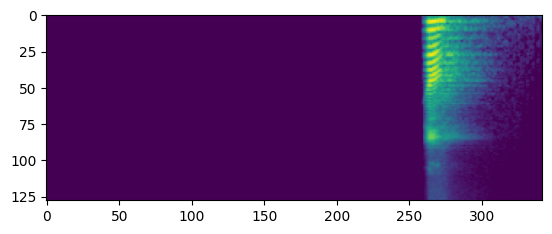

In [9]:
plt.imshow(data_0[1])

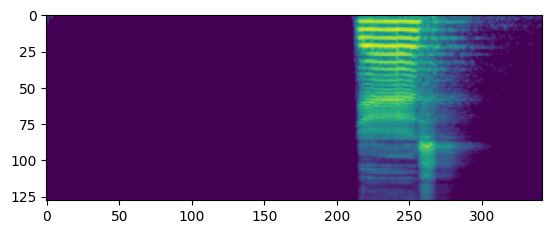

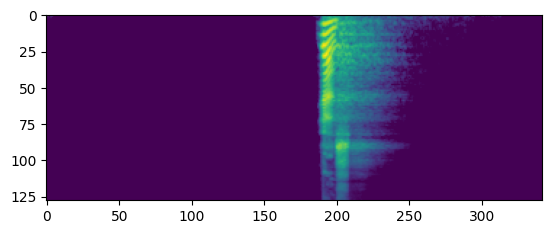

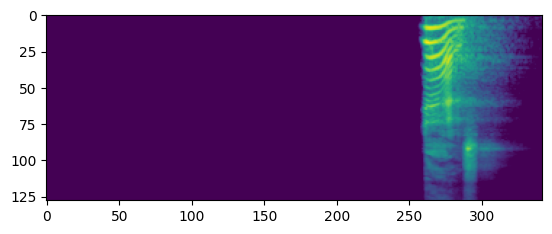

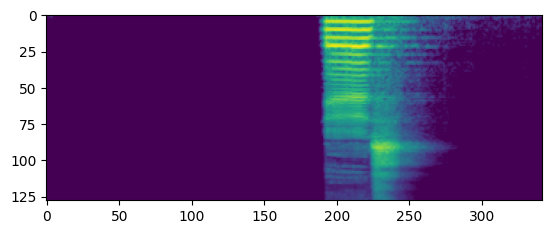

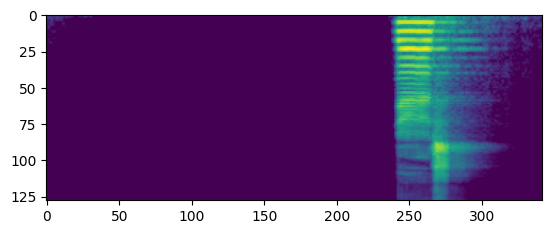

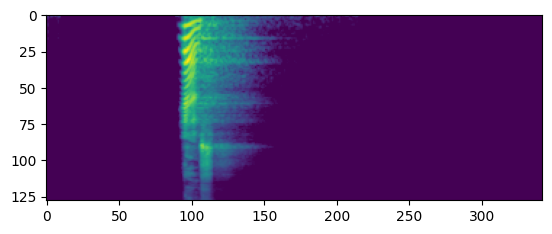

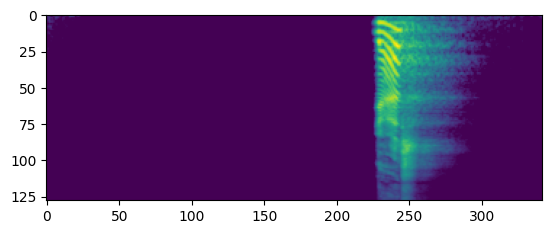

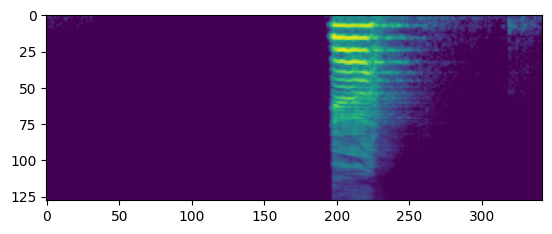

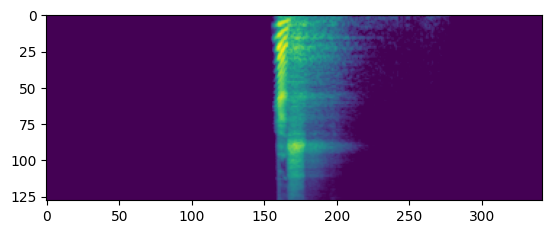

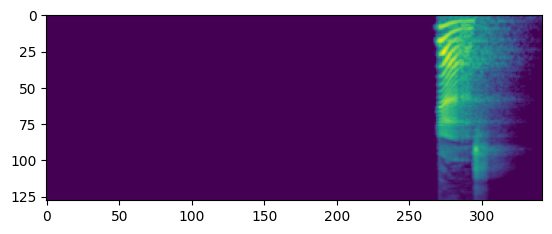

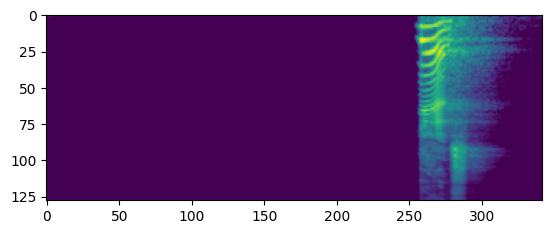

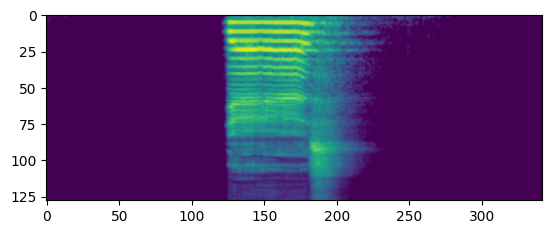

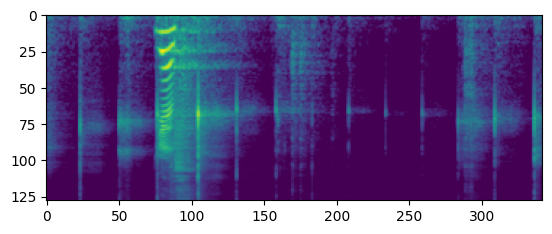

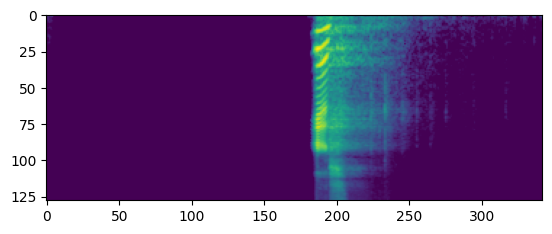

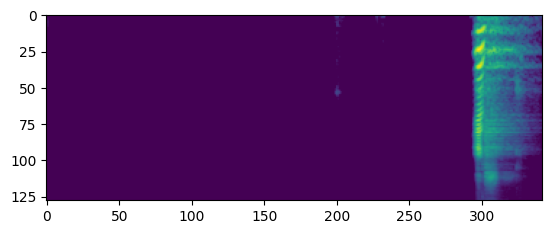

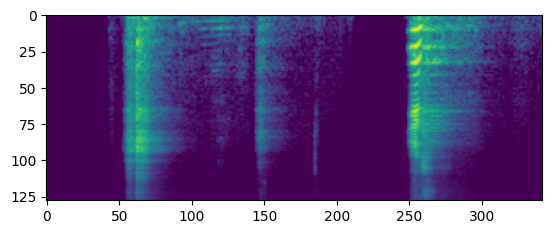

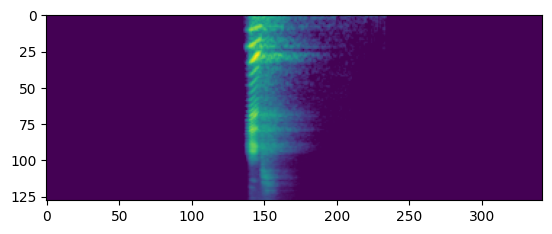

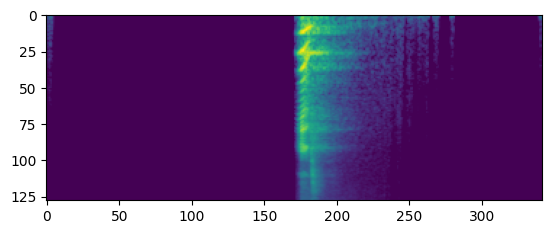

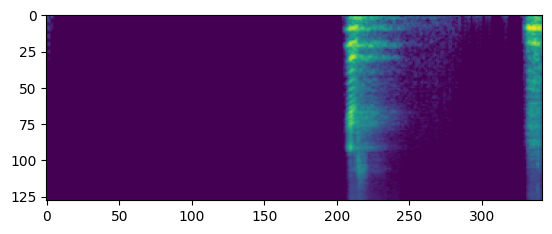

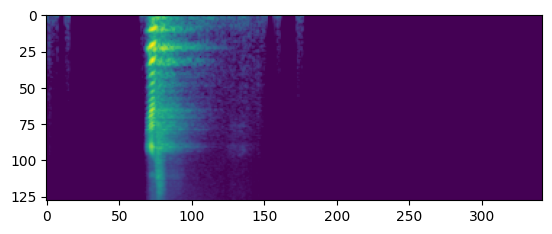

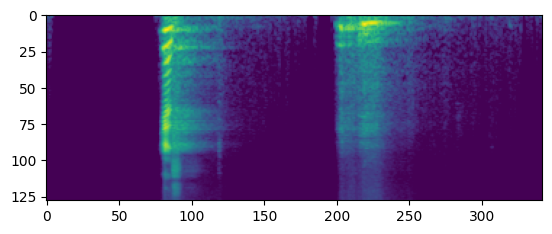

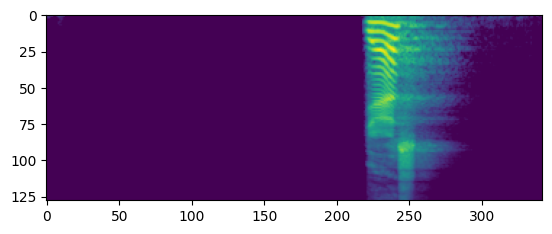

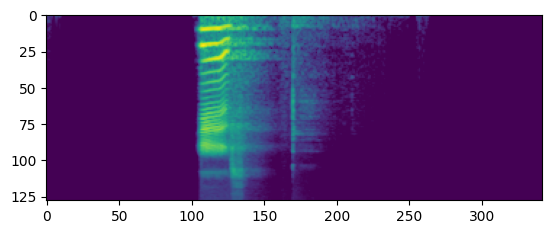

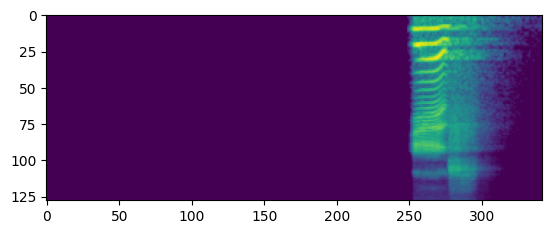

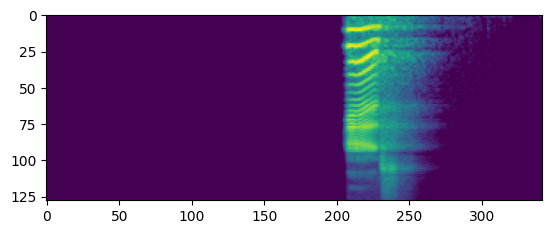

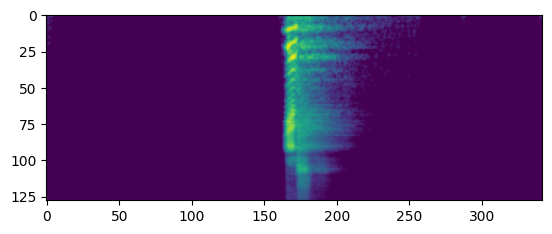

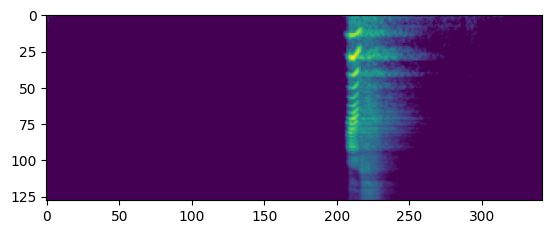

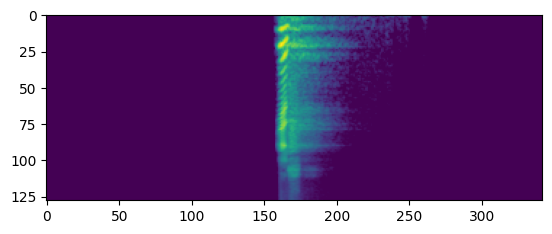

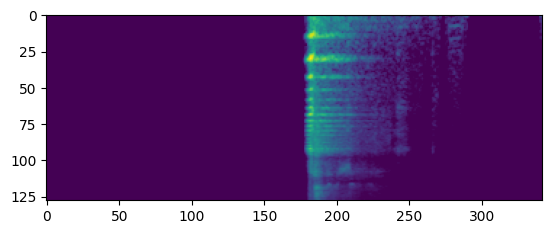

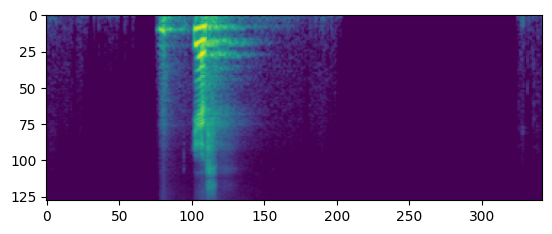

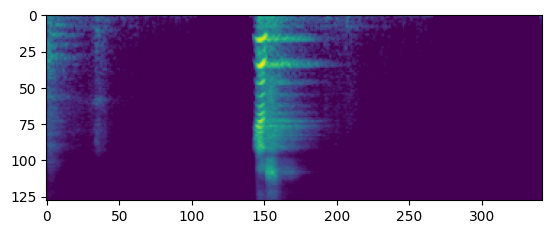

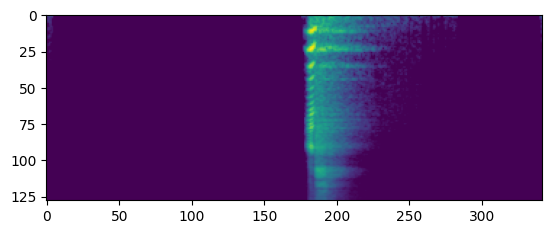

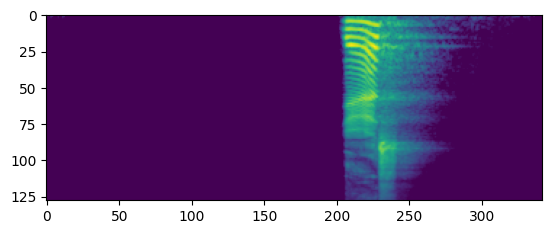

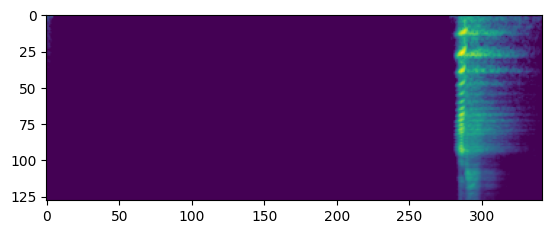

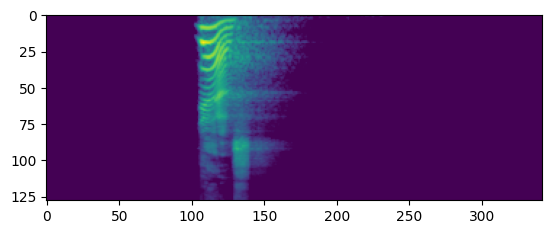

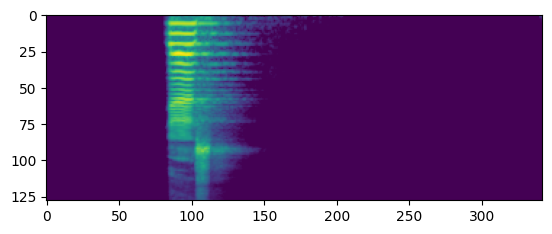

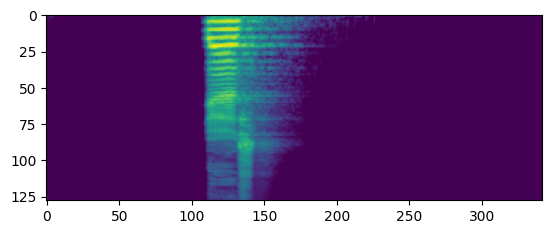

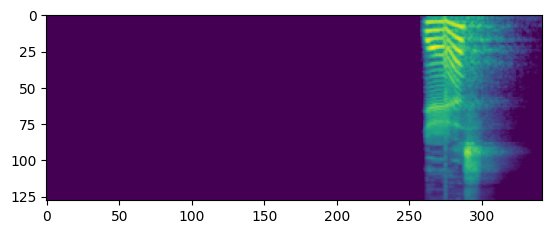

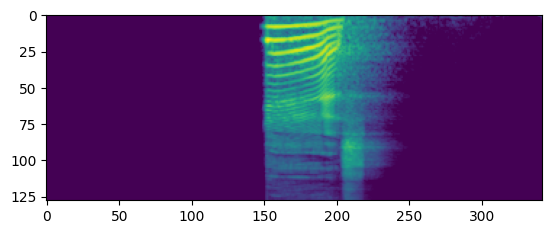

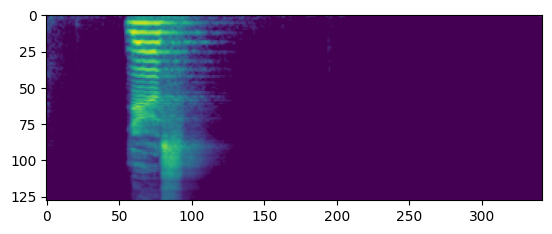

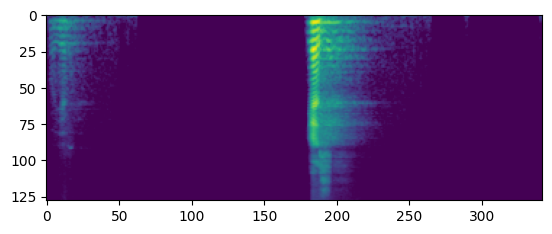

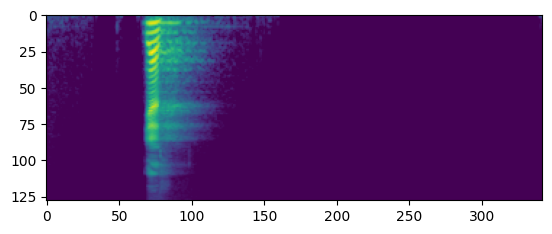

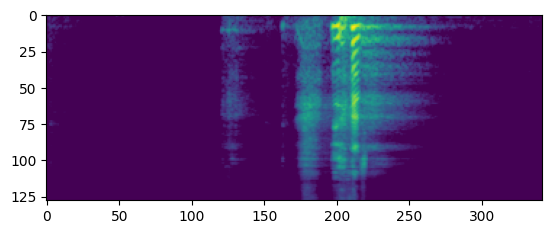

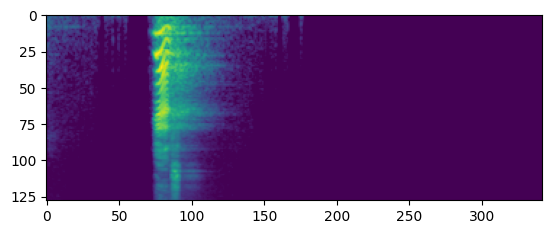

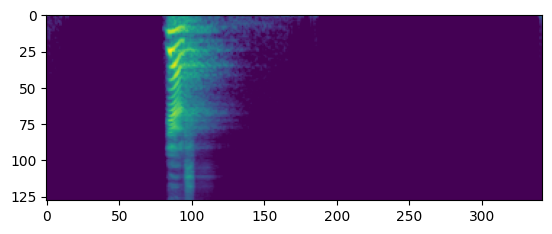

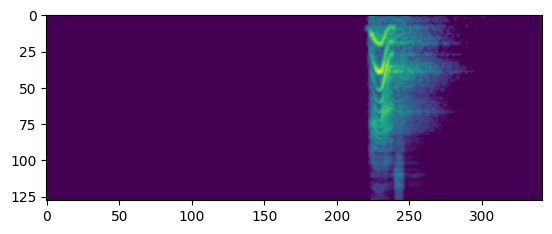

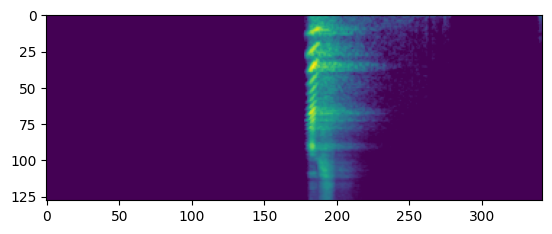

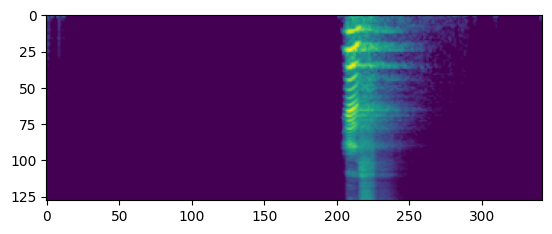

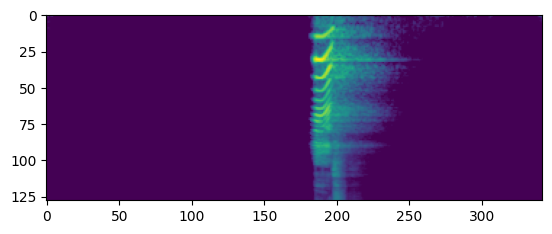

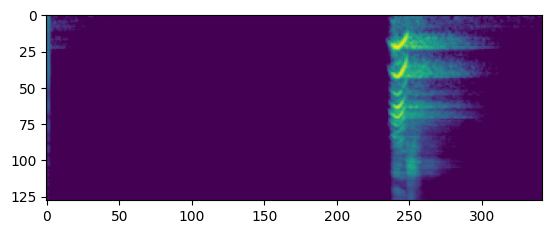

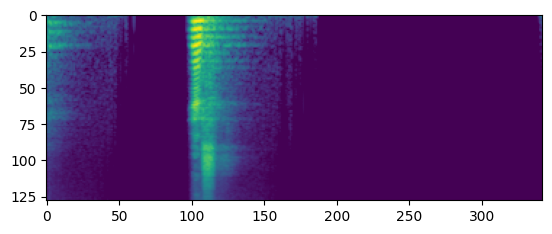

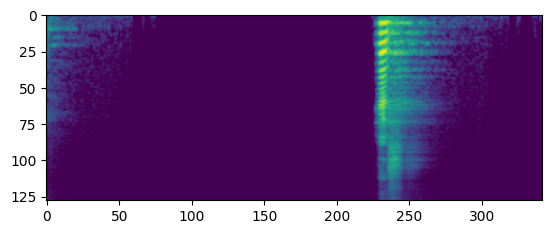

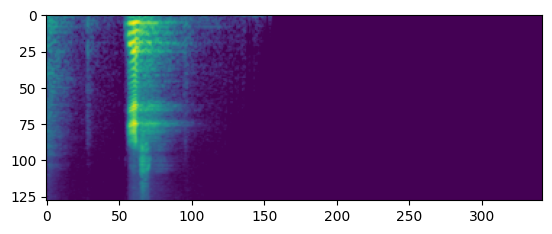

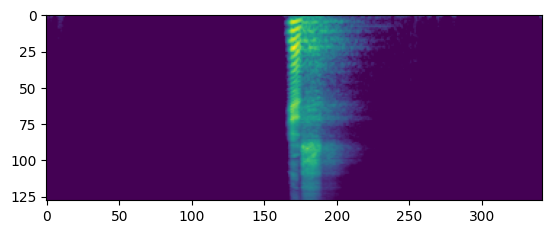

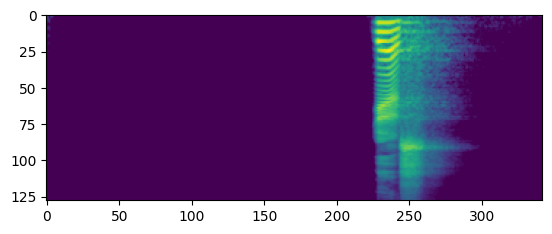

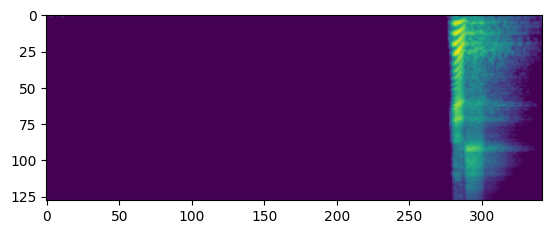

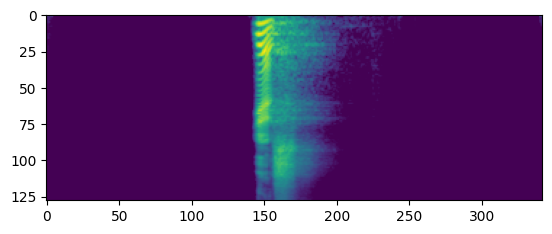

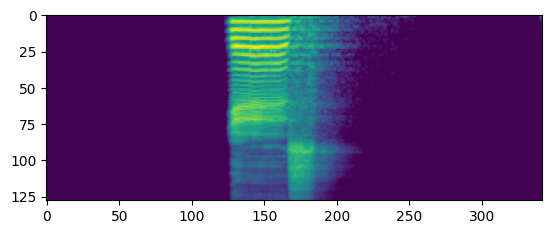

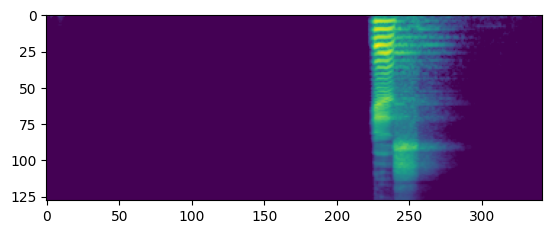

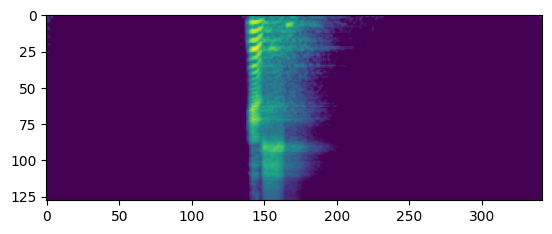

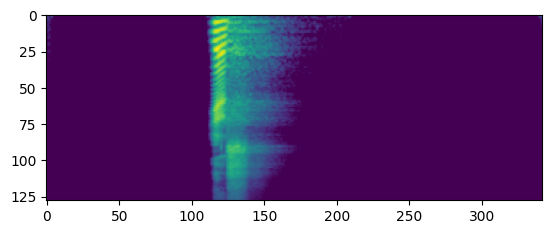

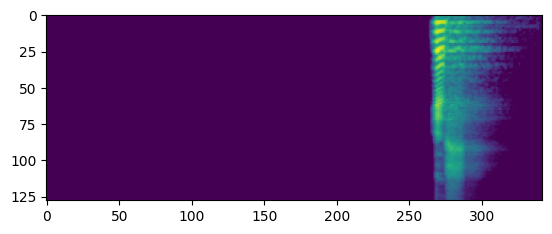

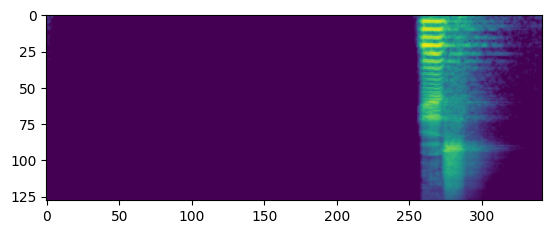

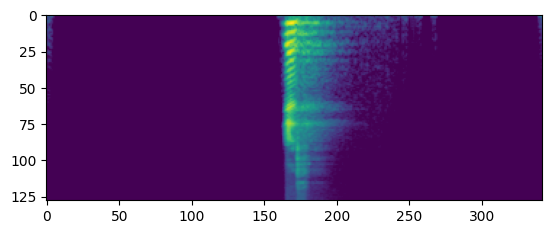

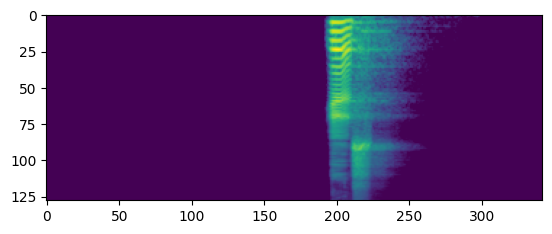

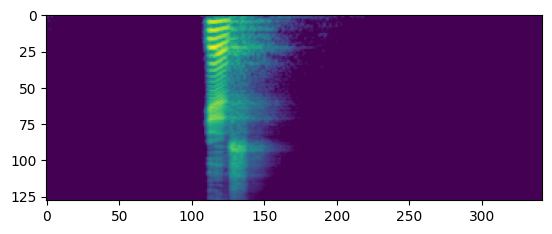

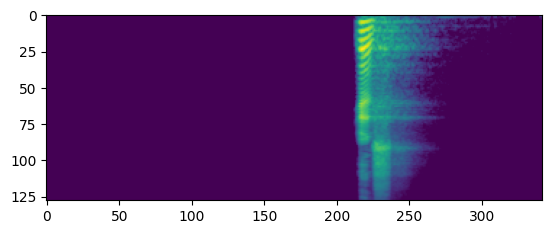

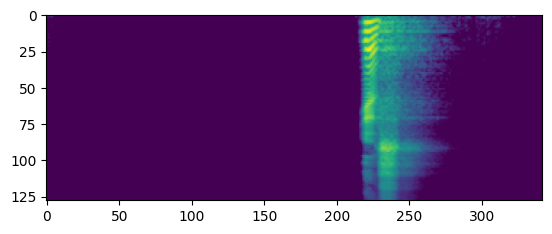

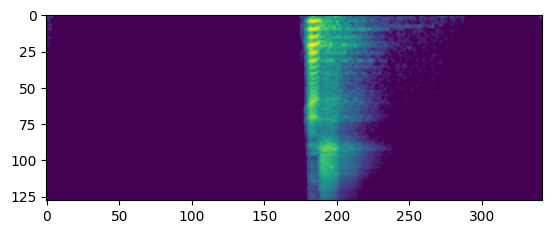

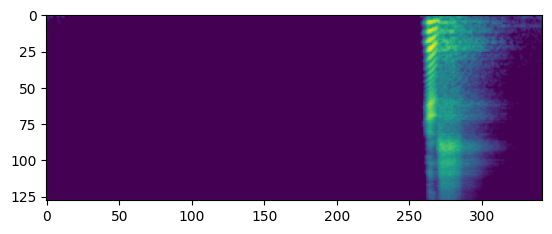

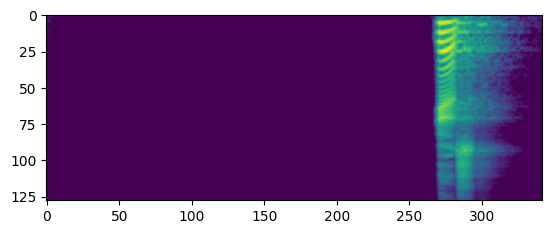

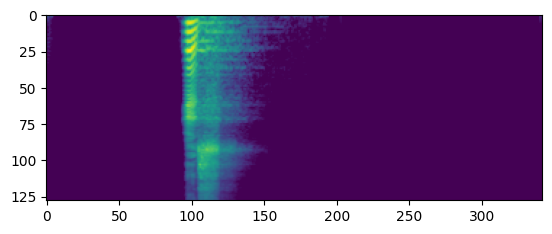

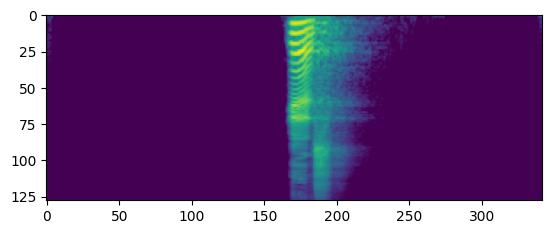

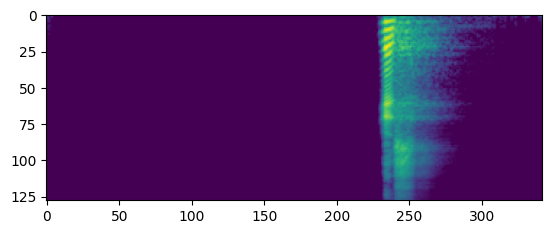

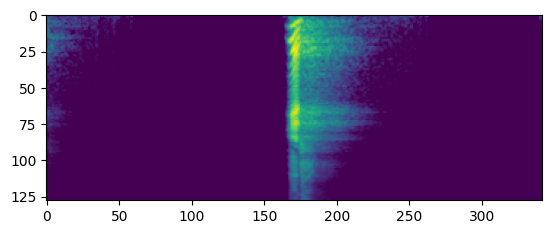

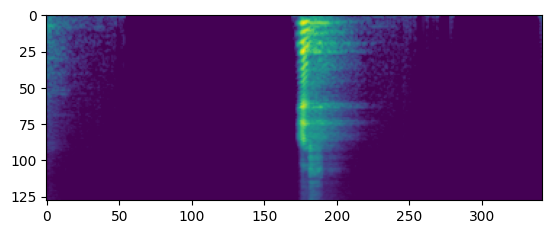

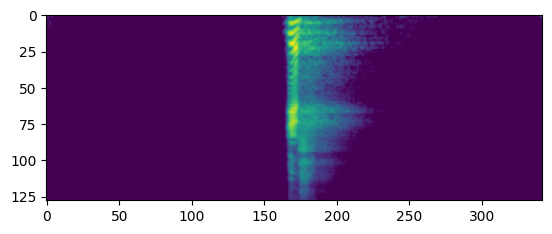

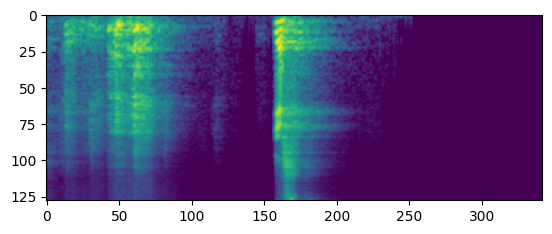

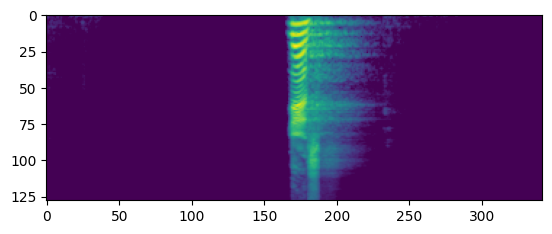

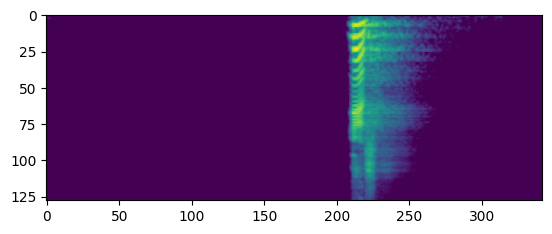

In [11]:
for i in data_1:
    plt.imshow(i)
    plt.show()

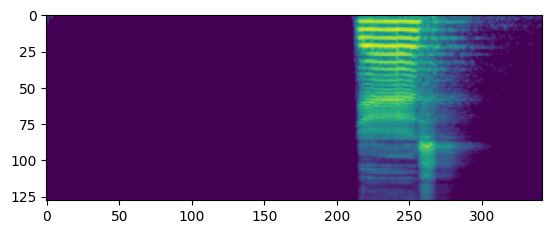

In [7]:
plt.imshow(data_1[0])

In [36]:
#create dataset and label list
data_list = []
label_list = []
for i in data_0:
    data_list.append(i)
    label_list.append(0)
for i in data_1:
    data_list.append(i)
    label_list.append(1)
data_list = np.array(data_list)
label_list = np.array(label_list)

In [37]:
np.random.shuffle(data_list)
np.random.shuffle(label_list)

In [51]:
num_data = data_list.shape[0]
split_rate = 0.75
split_at = int(np.floor(split_rate * num_data))

train_data = data_list[:split_at]
train_label = label_list[:split_at]

test_data = data_list[split_at:]
test_label = label_list[split_at:]



In [52]:
train_data[0]

array([[[2.63067632e-06],
        [1.08352608e-05],
        [1.11102063e-05],
        ...,
        [1.42898800e-07],
        [3.06405256e-06],
        [2.67969956e-06]],

       [[1.65489563e-06],
        [3.63785894e-06],
        [1.76751956e-06],
        ...,
        [1.10240205e-07],
        [2.33679489e-06],
        [2.10093285e-06]],

       [[1.01109509e-06],
        [2.39144915e-06],
        [5.38238324e-07],
        ...,
        [7.10966222e-08],
        [1.47433580e-06],
        [1.42942920e-06]],

       ...,

       [[1.79715373e-11],
        [6.61445529e-11],
        [2.26927339e-10],
        ...,
        [1.21446293e-11],
        [3.34084166e-10],
        [3.27339081e-10]],

       [[5.77318108e-11],
        [1.61219430e-10],
        [2.13828050e-10],
        ...,
        [1.32613770e-11],
        [3.46204734e-10],
        [3.23626959e-10]],

       [[6.33556794e-11],
        [1.39652287e-10],
        [2.48472567e-10],
        ...,
        [1.08407128e-11],
        [2.7546

In [53]:
train_data.shape

(120, 128, 342, 1)

In [54]:
# Sample data and labels as lists
# data_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# label_list = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Corresponding labels

batch_size = 15

# Convert data and labels to TensorFlow datasets
data_train_dataset = tf.data.Dataset.from_tensor_slices(train_data)
label_train_dataset = tf.data.Dataset.from_tensor_slices(train_label)

data_test_dataset = tf.data.Dataset.from_tensor_slices(test_data)
label_test_dataset = tf.data.Dataset.from_tensor_slices(test_label)

# Combine data and labels into a single dataset
train_dataset = tf.data.Dataset.zip((data_train_dataset, label_train_dataset))

test_dataset = tf.data.Dataset.zip((data_test_dataset, label_test_dataset))


train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)


(15, 128, 342, 1)
tf.Tensor([1 1 0 0 1 0 0 0 1 0 0 0 1 1 1], shape=(15,), dtype=int32)
(15, 128, 342, 1)
tf.Tensor([0 0 0 0 0 1 0 1 1 0 0 1 0 1 0], shape=(15,), dtype=int32)
(15, 128, 342, 1)
tf.Tensor([0 1 1 1 0 0 0 1 1 1 0 1 1 0 1], shape=(15,), dtype=int32)
(15, 128, 342, 1)
tf.Tensor([0 0 1 1 0 1 0 0 1 1 0 1 1 0 0], shape=(15,), dtype=int32)
(15, 128, 342, 1)
tf.Tensor([1 0 1 0 1 0 1 0 0 1 0 1 1 0 1], shape=(15,), dtype=int32)
(15, 128, 342, 1)
tf.Tensor([1 0 0 0 0 0 1 1 0 0 1 1 0 0 1], shape=(15,), dtype=int32)
(15, 128, 342, 1)
tf.Tensor([1 1 0 0 1 1 0 1 0 1 0 0 1 0 1], shape=(15,), dtype=int32)
(15, 128, 342, 1)
tf.Tensor([0 1 1 1 1 0 0 1 0 1 0 1 0 1 0], shape=(15,), dtype=int32)


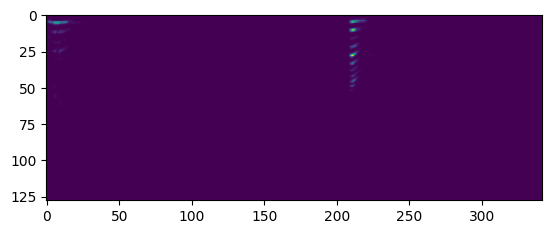

In [58]:
for image,label in train_dataset.take(10):
  plt.imshow(image[0])
  print(image.shape)
  print(label)

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Dense, Flatten
import tensorflow.keras.layers as nn
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 342,1)),
    nn.MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, (3,3), activation='relu'),
    nn.MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 340, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 170, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 168, 16)       4624      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 84, 16)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 40320)             0         
                                                                 
 dense_29 (Dense)            (None, 50)              

In [ ]:
t

In [73]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [74]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [75]:
model.fit(
    train_dataset,
    validation_data = test_dataset,
    epochs = 30,
    batch_size = 15)

Epoch 1/30
8/8 [==============================] - 2s 219ms/step - loss: 0.7063 - accuracy: 0.4333 - val_loss: 0.7313 - val_accuracy: 0.5366
Epoch 2/30
8/8 [==============================] - 2s 202ms/step - loss: 0.6250 - accuracy: 0.6833 - val_loss: 0.7422 - val_accuracy: 0.5366
Epoch 3/30
8/8 [==============================] - 2s 199ms/step - loss: 0.5887 - accuracy: 0.7917 - val_loss: 0.7601 - val_accuracy: 0.5610
Epoch 4/30
8/8 [==============================] - 2s 197ms/step - loss: 0.5584 - accuracy: 0.8750 - val_loss: 0.7816 - val_accuracy: 0.5366
Epoch 5/30
8/8 [==============================] - 2s 197ms/step - loss: 0.5246 - accuracy: 0.8750 - val_loss: 0.8101 - val_accuracy: 0.5610
Epoch 6/30
8/8 [==============================] - 2s 207ms/step - loss: 0.4861 - accuracy: 0.8667 - val_loss: 0.8433 - val_accuracy: 0.6098
Epoch 7/30
8/8 [==============================] - 1s 181ms/step - loss: 0.4458 - accuracy: 0.8583 - val_loss: 0.8931 - val_accuracy: 0.5122
Epoch 8/30
8/8 [====